=== Classified Data ===
   Marks    Category
0     32        Fail
1     56        Pass
2     78        Pass
3     45  Borderline
4     67        Pass
5     89        Pass
6     38        Fail
7     49  Borderline
8     52        Pass
9     41  Borderline


=== Frequency Count ===
Category
Fail          2
Borderline    3
Pass          5
Name: count, dtype: int64


=== Percentage of Each Category ===
Category
Fail          20.0
Borderline    30.0
Pass          50.0
Name: proportion, dtype: float64


=== Data Structure ===
Marks          int64
Category    category
dtype: object


=== Statistical Insights ===
Mean Marks: 54.7
Median Marks: 50.5
Standard Deviation: 17.286121600868135


Number of Students at Risk: 5


Enter new thresholds for dynamic classification:
Enter PASS threshold (e.g., 50): 29
Enter BORDERLINE minimum (e.g., 40): 46

=== Updated Classification with Dynamic Thresholds ===
   Marks    Category Dynamic_Category
0     32        Fail             Fail
1     56        Pass 

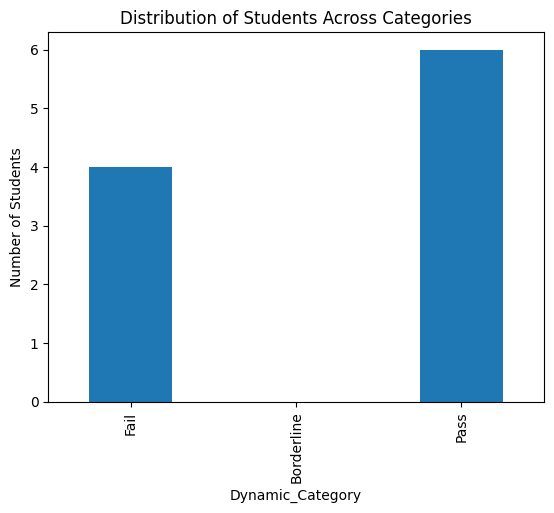

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------
# 1. DATA PREPARATION & CLASSIFICATION
# ------------------------------------------------------

# Step 1: Create a list of student marks (You may modify these values)
marks = [32, 56, 78, 45, 67, 89, 38, 49, 52, 41]

# Default classification thresholds
def classify_mark(score, pass_mark=50, borderline_min=40):
    if score < borderline_min:
        return "Fail"
    elif borderline_min <= score < pass_mark:
        return "Borderline"
    else:
        return "Pass"

# Classify marks
categories = [classify_mark(m) for m in marks]

# Convert to pandas categorical with order
cat_type = pd.CategoricalDtype(categories=["Fail", "Borderline", "Pass"], ordered=True)
df = pd.DataFrame({"Marks": marks, "Category": pd.Series(categories, dtype=cat_type)})

print("=== Classified Data ===")
print(df)
print("\n")

# ------------------------------------------------------
# 2. DATA EXPLORATION
# ------------------------------------------------------

# Frequency count
freq = df["Category"].value_counts().sort_index()
print("=== Frequency Count ===")
print(freq)
print("\n")

# Percentage
percentage = df["Category"].value_counts(normalize=True).sort_index() * 100
print("=== Percentage of Each Category ===")
print(percentage)
print("\n")

# Data type & structure
print("=== Data Structure ===")
print(df.dtypes)
print("\n")


# ------------------------------------------------------
# 3. STATISTICAL INSIGHTS
# ------------------------------------------------------

mean_val = np.mean(marks)
median_val = np.median(marks)
std_val = np.std(marks)

print("=== Statistical Insights ===")
print(f"Mean Marks: {mean_val}")
print(f"Median Marks: {median_val}")
print(f"Standard Deviation: {std_val}")
print("\n")

# Students at risk (Fail + Borderline)
at_risk = df[df["Category"] != "Pass"].shape[0]
print(f"Number of Students at Risk: {at_risk}")
print("\n")


# ------------------------------------------------------
# 4. LEVEL 5 – DYNAMIC THRESHOLDS + PLOTTING
# ------------------------------------------------------

def classify_dynamic(score, new_pass, new_borderline):
    if score < new_borderline:
        return "Fail"
    elif new_borderline <= score < new_pass:
        return "Borderline"
    else:
        return "Pass"

print("Enter new thresholds for dynamic classification:")
new_pass = int(input("Enter PASS threshold (e.g., 50): "))
new_borderline = int(input("Enter BORDERLINE minimum (e.g., 40): "))

dynamic_categories = [classify_dynamic(m, new_pass, new_borderline) for m in marks]

df["Dynamic_Category"] = pd.Series(dynamic_categories, dtype=cat_type)

print("\n=== Updated Classification with Dynamic Thresholds ===")
print(df)

# Plotting distribution
plt.title("Distribution of Students Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Students")
df["Dynamic_Category"].value_counts().sort_index().plot(kind="bar")
plt.show()
